## Access Satellite Chlorophylla Oci 1Day NOAA20 data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_chlorophylla_oci_1day_noaa20 dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/a9e03db8-f277-45d1-821d-cfcbfe8ae6be).

In [1]:
dataset_name = "satellite_chlorophylla_oci_1day_noaa20"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    import xarray as xr
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 234 packages in 28ms


In [4]:
import requests
import os
if not os.path.exists('DataQuery.py'):
  print('Downloading DataQuery.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/DataQuery.py'
  response = requests.get(url)
  with open('DataQuery.py', 'w') as f:
      f.write(response.text)

In [5]:
from DataQuery import plot_gridded_variable, create_timeseries, plot_time_coverage

In [6]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), chunks=None, consolidated=True)
ds

<xarray.Dataset> Size: 2TB
Dimensions:    (time: 797, latitude: 9601, longitude: 13601)
Coordinates:
  * latitude   (latitude) float64 77kB 12.0 11.99 11.98 ... -59.98 -59.99 -60.0
  * longitude  (longitude) float64 109kB 78.0 78.01 78.02 ... 180.0 180.0 180.0
  * time       (time) datetime64[ns] 6kB 2023-02-08T05:30:00 ... 2025-04-14T0...
Data variables:
    chl_oci    (time, latitude, longitude) float64 833GB ...
    filename   (time) <U39 124kB ...
    l2_flags   (time, latitude, longitude) float64 833GB ...
Attributes:
    Conventions:                CF-1.6
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    history:                    Mon Jan 27 06:29:22 2025: ncks -A -v l2_flags...
    history_of_appended_files:  Mon Jan 27 06:29:22 2025: Appended file J2025...
    source_path:                imos-srs/archive/oc/jpss1/v202303/1d/2025/01/...

## Plot time coverage

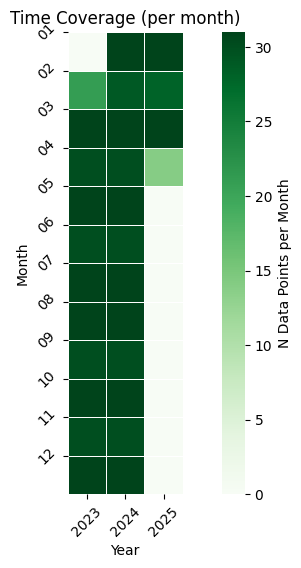

In [7]:
plot_time_coverage(ds)

## Timeseries at a point

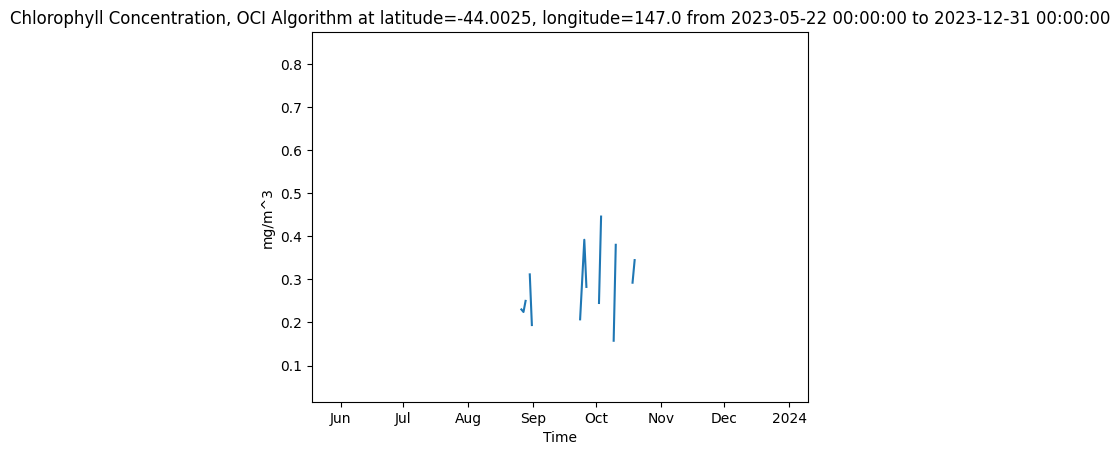

CPU times: user 2.24 s, sys: 469 ms, total: 2.71 s
Wall time: 6.99 s


In [8]:
%%time
time_series_df = create_timeseries(ds, 'chl_oci', lat=-44, lon=147, start_time='2023-05-22', end_time='2023-12-31', lon_name="longitude", lat_name="latitude")

## Plot a gridded variable

Nearest date in dataset: <xarray.DataArray 'time' ()> Size: 8B
array('2023-02-08T05:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2023-02-08T05:30:00
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time
Variable Long Name: Chlorophyll Concentration, OCI Algorithm
No valid data for 2023-02-08 05:30:00, skipping this date.
No data for 2023-02-08 05:30:00, skipping plot.


/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:880: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


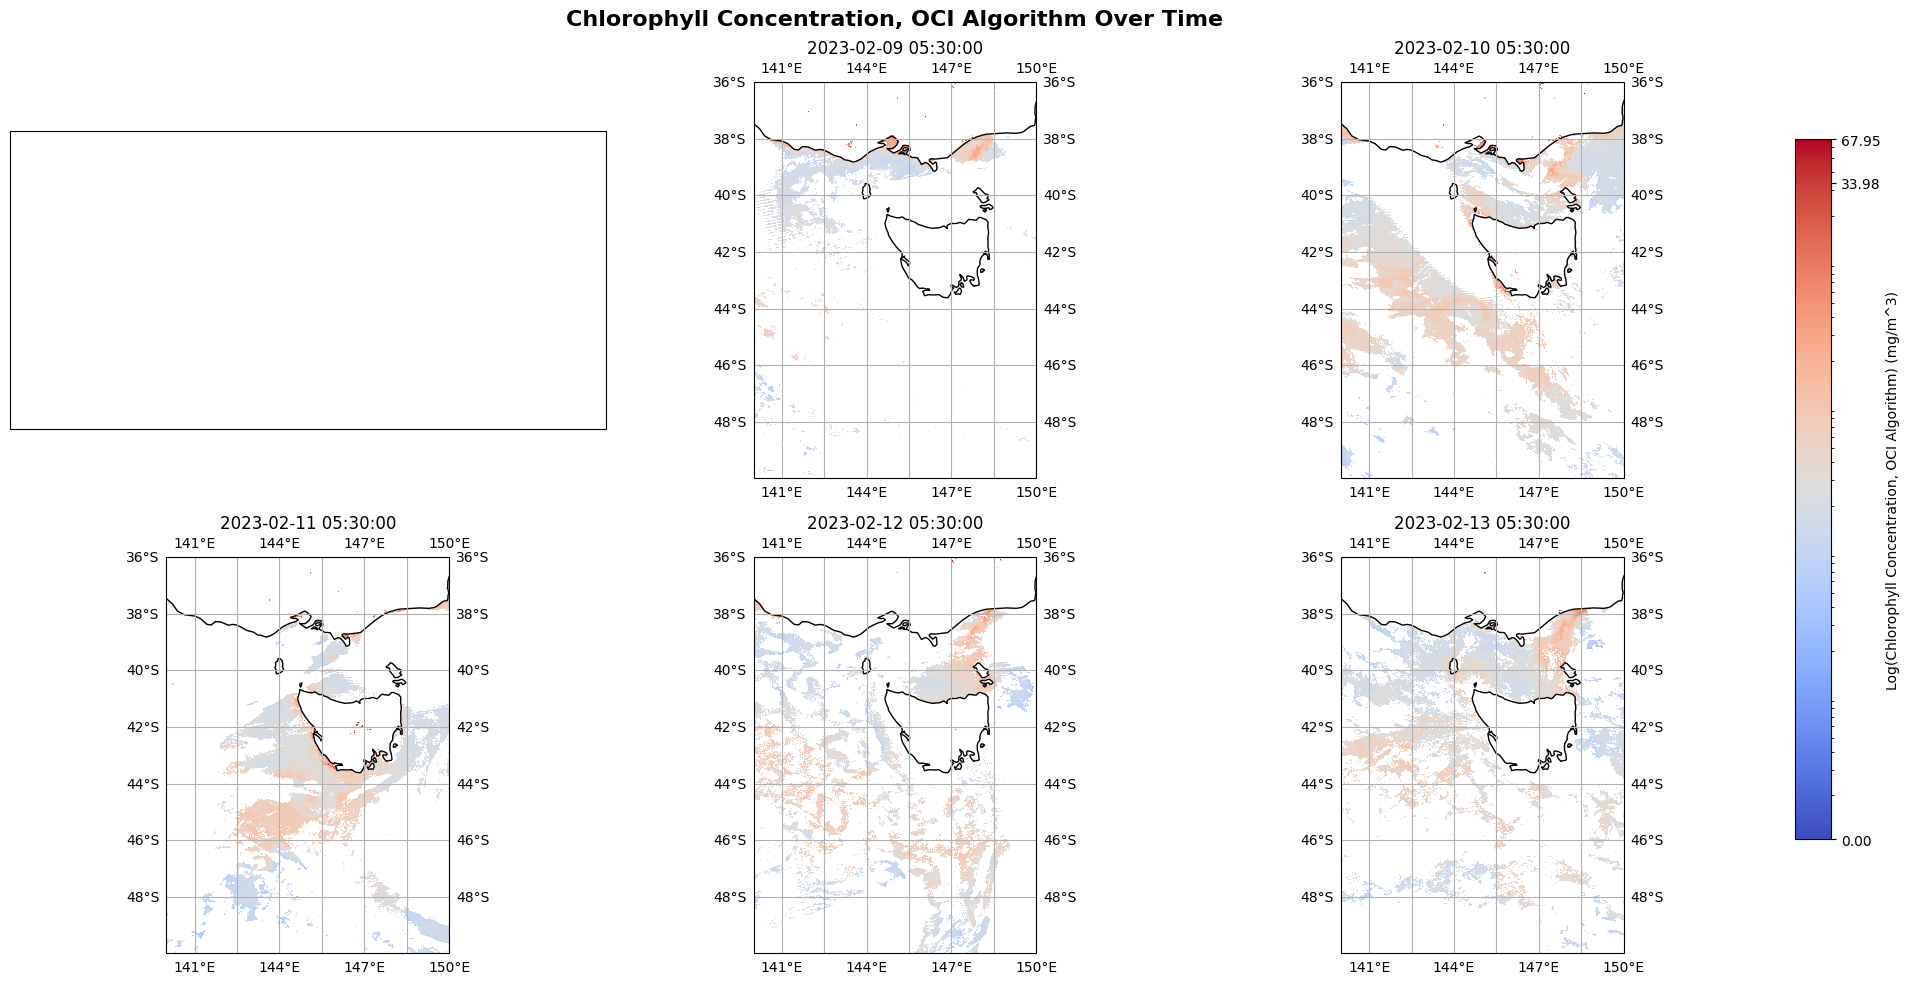

CPU times: user 9.88 s, sys: 7.4 s, total: 17.3 s
Wall time: 25.7 s


In [9]:
%%time
plot_gridded_variable(ds, start_date='2022-05-22', lon_slice=(140, 150), lat_slice=(-50, -36), var_name='chl_oci', n_days=6, coastline_resolution="50m", lon_name="longitude", lat_name="latitude", log_scale=True)